In [52]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# Building the Model

## Loading Dataframes

In [53]:
train_set = pd.read_pickle("./normalized_train_data.pkl")

In [54]:
train_set

,current_age,retirement_age,birth_year,birth_month,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,expires_month,...,city_target_encoded,state_target_encoded,zipcode_target_encoded,card_brand_target_encoded,card_type_target_encoded,cvv_target_encoded,merchant_city_target_encoded,merchant_state_target_encoded,mcc_target_encoded,purchase_zip_target_encoded
0,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,1.000000,...,0.933333,0.540025,0.933333,0.483930,0.467805,0.777778,0.872245,0.872245,0.833333,0.866279
1,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,1.000000,...,0.933333,0.540025,0.933333,0.483930,0.467805,0.777778,0.872245,0.872245,0.833333,0.866279
2,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,1.000000,...,0.933333,0.540025,0.933333,0.483930,0.467805,0.777778,0.872245,0.872245,0.984962,0.866279
3,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,1.000000,...,0.933333,0.540025,0.933333,0.483930,0.467805,0.777778,0.872245,0.872245,0.833333,0.866279
4,0.384615,0.551724,0.615385,0.909091,0.179460,0.213046,0.276306,0.825967,0.500,1.000000,...,0.933333,0.540025,0.933333,0.483930,0.467805,0.777778,0.872245,0.872245,1.000000,0.866279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,0.115385,0.689655,0.884615,0.545455,0.144350,0.171340,0.190183,0.593923,0.250,0.090909,...,0.000000,0.455526,0.000000,0.662281,0.527970,0.000000,0.000000,0.122449,0.000000,0.000000
5995,0.500000,0.517241,0.500000,0.909091,0.148445,0.176222,0.226219,0.696133,0.375,0.909091,...,0.777778,0.246154,0.000000,0.494750,0.467805,0.428571,0.500000,0.066667,0.000000,0.000000
5996,0.307692,0.586207,0.705128,0.000000,0.093015,0.110425,0.153871,0.803867,0.250,0.000000,...,0.000000,0.454545,0.000000,0.543662,0.527970,0.000000,0.000000,0.242718,0.130982,0.000000
5997,0.307692,0.586207,0.705128,0.000000,0.093015,0.110425,0.153871,0.803867,0.250,0.000000,...,0.000000,0.454545,0.000000,0.483930,0.527970,0.000000,0.000000,0.242718,0.282609,0.000000


In [55]:
validation_set = pd.read_pickle("./normalized_validation_data.pkl")

In [56]:
validation_set

,current_age,retirement_age,birth_year,birth_month,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,expires_month,...,city_target_encoded,state_target_encoded,zipcode_target_encoded,card_brand_target_encoded,card_type_target_encoded,cvv_target_encoded,merchant_city_target_encoded,merchant_state_target_encoded,mcc_target_encoded,purchase_zip_target_encoded
0,0.421687,0.551724,0.571429,0.909091,0.213042,0.213046,0.276306,0.829730,0.500,0.636364,...,0.0,0.018321,0.0,0.023462,0.020270,0.0,0.000000,0.000000,0.001927,0.000000
1,0.421687,0.551724,0.571429,0.909091,0.213042,0.213046,0.276306,0.829730,0.500,0.636364,...,0.0,0.018321,0.0,0.023462,0.020270,0.0,0.000000,0.003711,0.006173,0.000000
2,0.759036,0.586207,0.238095,0.909091,0.165039,0.119494,0.000424,0.589189,0.500,0.181818,...,0.0,0.018321,0.0,0.016053,0.018764,0.0,0.000000,0.003711,0.057416,0.000000
3,0.759036,0.586207,0.238095,0.909091,0.165039,0.119494,0.000424,0.589189,0.500,0.181818,...,0.0,0.018321,0.0,0.016053,0.018764,0.0,0.057489,0.057489,0.000000,0.123139
4,0.759036,0.586207,0.238095,0.909091,0.165039,0.119494,0.000424,0.589189,0.500,0.181818,...,0.0,0.018321,0.0,0.016053,0.018764,0.0,0.057489,0.057489,0.000000,0.123139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,0.578313,0.344828,0.428571,0.090909,0.184358,0.195051,0.058982,0.372973,0.000,0.636364,...,0.0,0.011364,0.0,0.016053,0.020270,0.0,0.000000,0.000000,0.016807,0.000000
5093,0.036145,0.344828,0.952381,0.909091,0.235214,0.235219,0.392464,0.521622,0.125,1.000000,...,0.0,0.024390,0.0,0.023462,0.020270,0.0,0.000000,0.000000,0.000000,0.000000
5094,0.036145,0.344828,0.952381,0.909091,0.235214,0.235219,0.392464,0.521622,0.125,1.000000,...,0.0,0.024390,0.0,0.023462,0.020270,0.0,0.000000,0.000000,0.002577,0.000000
5095,0.036145,0.344828,0.952381,0.909091,0.235214,0.235219,0.392464,0.521622,0.125,1.000000,...,0.0,0.024390,0.0,0.023462,0.020270,0.0,0.057489,0.057489,0.029126,0.123139


## Shuffling dataset

In [57]:
train_set = train_set.sample(frac=1)

## Removing Year from data (due to bias)

In [58]:
train_set = train_set.drop('year', axis=1)

In [59]:
validation_set = validation_set.drop('year', axis=1)

## Separating into Data and Labels

### Training

In [60]:
train_data = train_set.drop(columns="is_fraud").values.astype('float32')
train_labels = train_set['is_fraud'].values.astype('float32')

In [61]:
print(train_data)

[[0.4871795  0.37931034 0.51282054 ... 0.1897019  0.371134   1.        ]
 [0.12820514 0.7586207  0.8717949  ... 0.8722452  0.7826087  0.86627907]
 [0.2948718  0.62068963 0.7051282  ... 0.10576923 0.         0.        ]
 ...
 [0.61538464 0.62068963 0.3846154  ... 0.8722452  0.7826087  0.86627907]
 [0.44871795 0.55172414 0.55128205 ... 0.8722452  0.7282609  0.86627907]
 [0.15384616 0.5862069  0.84615386 ... 0.1897019  0.371134   0.        ]]


In [62]:
print(train_labels)

[1. 1. 0. ... 1. 1. 0.]


### Validation

In [63]:
validation_data = validation_set.drop(columns="is_fraud").values.astype('float32')
validation_labels = validation_set['is_fraud'].values.astype('float32')

In [64]:
print(validation_data)

[[0.42168674 0.55172414 0.5714286  ... 0.         0.00192678 0.        ]
 [0.42168674 0.55172414 0.5714286  ... 0.00371058 0.00617284 0.        ]
 [0.7590361  0.5862069  0.23809524 ... 0.00371058 0.05741627 0.        ]
 ...
 [0.03614458 0.3448276  0.95238096 ... 0.         0.00257732 0.        ]
 [0.03614458 0.3448276  0.95238096 ... 0.05748865 0.02912621 0.12313937]
 [0.03614458 0.3448276  0.95238096 ... 0.05748865 0.02912621 0.12313937]]


In [65]:
print(validation_labels)

[0. 0. 0. ... 0. 0. 0.]


## Defining and Compiling the Model

In [66]:
def displayColumnNames(df):
    temp = 0
    for c in df.columns:
        print(f"{temp} {c}")
        temp += 1

In [67]:
train_data.shape

(5999, 45)

In [68]:
train_labels.shape

(5999,)

In [69]:
model = Sequential()
model.add(Dense(128,  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training Model

In [70]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
BATCH_SIZE = 5

history = model.fit(train_data, train_labels, validation_data=(validation_data,validation_labels), epochs=20, batch_size=BATCH_SIZE, callbacks=callback)

Epoch 1/20
1200/1200 [==============================] - 16s 12ms/step - loss: 0.0874 - accuracy: 0.9717 - val_loss: 0.0672 - val_accuracy: 0.9841
Epoch 2/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.0569 - accuracy: 0.9828 - val_loss: 0.0558 - val_accuracy: 0.9847
Epoch 3/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.0476 - accuracy: 0.9853 - val_loss: 0.0932 - val_accuracy: 0.9833
Epoch 4/20
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0631 - val_accuracy: 0.9855
Epoch 5/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0606 - val_accuracy: 0.9833
Epoch 6/20
1200/1200 [==============================] - 14s 11ms/step - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.0777 - val_accuracy: 0.9837
Epoch 7/20
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.1087 -

## Evaluating Model

In [72]:
accuracy = model.evaluate(validation_data, validation_labels)

print('Loss: %.2f' % (accuracy[0]*100))
print('Accuracy: %.2f' % (accuracy[1]*100))

160/160 [==============================] - 1s 5ms/step - loss: 0.2121 - accuracy: 0.9829
Loss: 21.21
Accuracy: 98.29


### Testing Model

In [73]:
predictions = model.predict(validation_data)

160/160 [==============================] - 1s 3ms/step


In [74]:
print(predictions)

[[3.2709861e-14]
 [1.8565099e-11]
 [4.8907670e-11]
 ...
 [1.4086586e-19]
 [2.8565470e-12]
 [5.1152711e-12]]


In [75]:
table = [[0,0],[0,0]]

for i in range(predictions.size):
    if predictions[i] < 0.5:
        if validation_labels[i] == 0:
            table[0][0] += 1
        else:
            table[0][1] += 1
    else:
        if validation_labels[i] == 0:
            table[1][0] += 1
        else:
            table[1][1] += 1
    
print(table)

[[4998, 87], [0, 12]]


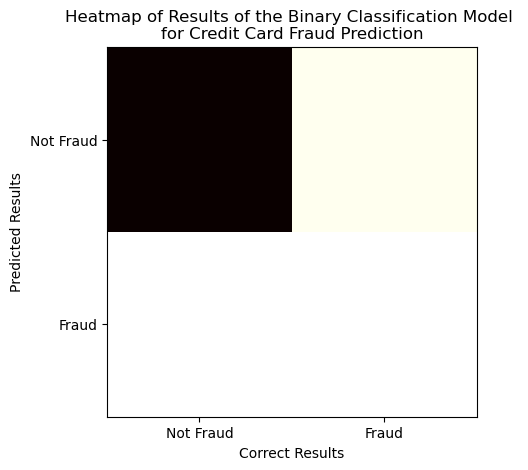

In [76]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(table, cmap='hot_r', interpolation='nearest')
plt.xticks([0,1], ["Not Fraud", "Fraud"])
plt.yticks([0,1], ["Not Fraud", "Fraud"])
plt.title("Heatmap of Results of the Binary Classification Model \nfor Credit Card Fraud Prediction")
plt.xlabel("Correct Results")
plt.ylabel("Predicted Results")
plt.show()

In [77]:
barTable = {
    "True Negative":table[0][0],
    "False Negative":table[0][1],
    "False Positive":table[1][0],
    "True Positive":table[1][1]
}

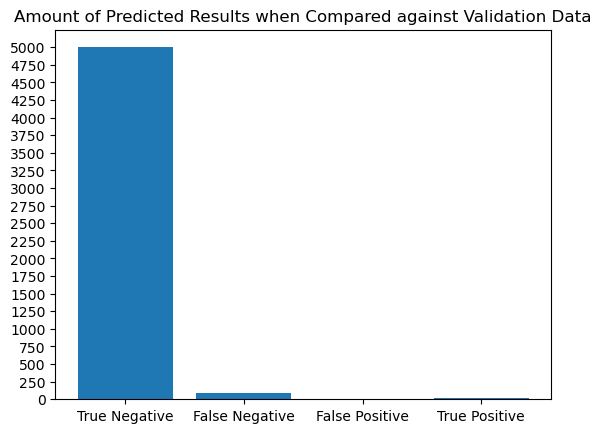

In [78]:
Y_STEP = 250

plt.bar(range(len(barTable)), list(barTable.values()), align='center')
plt.xticks(range(len(barTable)), list(barTable.keys()))
plt.yticks(np.arange(0, max(barTable.values()) + Y_STEP, Y_STEP))
plt.title("Amount of Predicted Results when Compared against Validation Data")
plt.show()

## Saving Model

In [79]:
model.save("CreditCardFraudDetection_unabalanced_validation.keras")